### 5. 트리 알고리즘
#### 5-1. 결정 트리

In [3]:
# 로지스틱 회귀로 와인 분류하기

import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


레드와인과 화이트와인을 구분하는 이진 분류 문제이며, 화이트와인이 양성클래스

In [4]:
# 데이터프레임의 각 열의 데이터 타입과 누락된 데이터 유무 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
# 열애 대한 간략한 통계 출력
# 최소, 최대, 평균값 등
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
# 특성과 타깃을 추출
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [7]:
# 훈련 세트와 테스트 세트로 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)
# 설정값을 지정하지 않으면 25%를 테스트 세트로 지정

In [8]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [9]:
# 훈련 세트 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


훈련 세트와 테스트 세트의 점수가 모두 낮다 
= **'과소적합'**

1. 규제 매개 변수 C의 값을 변경
2. solver 매개변수에서 다른 알고리즘을 선택
3. 다항 특성을 만들어 추가

In [11]:
# 로지스틱 회귀가 학습한 계수와 절편을 출력
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


**로지스틱 회귀**: “1일 가능성이 얼마나 되는지”를 계산하는 모델 

- **계수(coef)**: 특성이 증가하면, 1일 확률이 얼마나 움직이는지를 알려주는 숫자 <br>
    - 계수 양수 → 1일 확률 올라감 <br>
    - 계수 음수 → 1일 확률 내려감 

- **절편(intercept)**: 아무 특징이 변하지 않았을 때의 기본 확률

**결정트리(Decision Tree)**: 데이터를 질문(조건)을 통해 계속 쪼개면서 최종적으로 예측 또는 분류를 수행하는 모델

In [12]:
# 결정 트리 모델 훈련
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
# 사이킷런의 결정 트리 알고리즘은 노드에서 최적의 분할을 찾기 전에 특성의 순서를 섞은 다음 분할에 사용할 일부 특성을 선택
# 모든 특성을 사용하는 경우에도 성능이 동일한 두 개의 분할 지점이 있다면 랜덤하게 하나를 선택
# 실무에서는 random_state를 지정하지 않음 

dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))     # 훈련 세트
print(dt.score(test_scaled, test_target))       # 테스트 세트 


0.996921300750433
0.8592307692307692


테스트 세트의 점수가 훈련 세트의 점수보다 낮다 
= **'과대적합'**

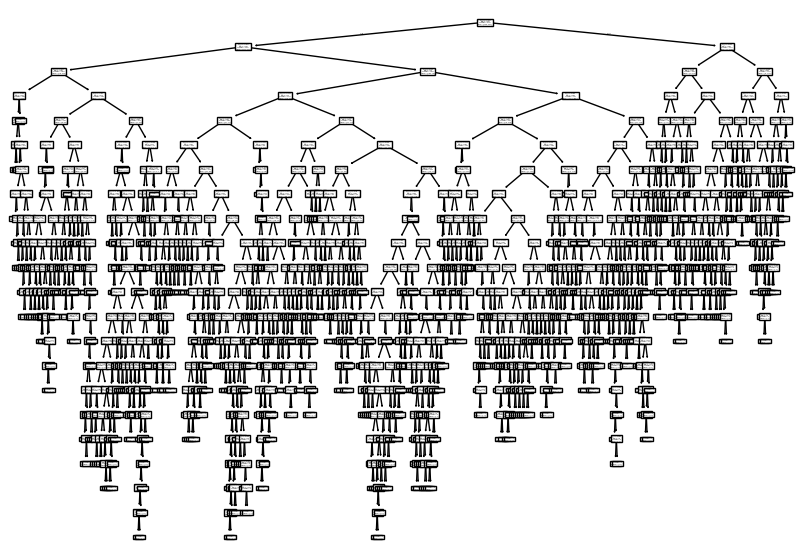

In [13]:
# 결정 트리 모델을 그림으로 표현
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

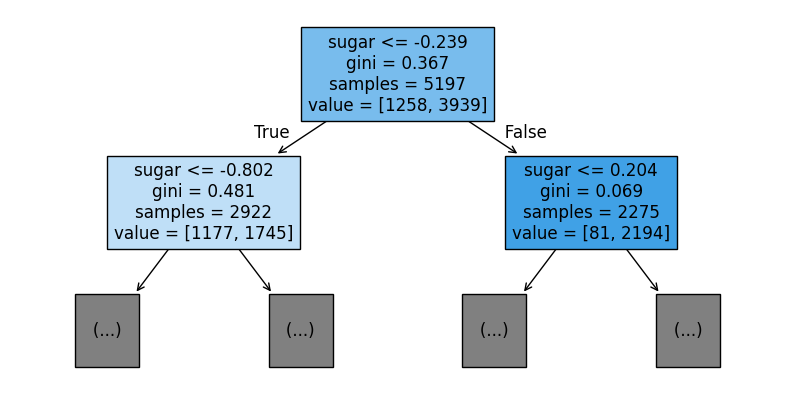

In [14]:
# 트리의 깊이를 제한해서 출력
plt.figure(figsize=(10,5))
plot_tree(dt, max_depth=1, filled=True,             
          feature_names=['alcohol', 'sugar', 'pH'])
# max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장
# filled 매개변수에서는 클래스의 맞게 노드를 색칠 

plt.show()

**지니 불순도(Gini impurity)**: 결정트리가 데이터를 분리할 때 '얼마나 섞여 있는지'를 숫자로 표현한 지표 

    섞여 있으면 불순도 ↑, 한 가지로 모여 있으면 불순도 

$
\text{Gini} = 1- (\text{음성 클래스 비율}^2 + \text{양성 클래스 비율}^2)
$

---

**정보 이득** = 부모 노드의 엔트로피 − 자식 노드들의 엔트로피(샘플 비율로 가중 평균)

노드를 더 순수하게 나눌수록 자식 노드 엔트로피가 크게 감소 → 정보 이득 증가 → 더 좋은 분할

---

**엔트로피 불순도(Entropy Impurity)**: 노드 안에 클래스가 얼마나 섞여 있는지 측정하는 지표

    클래스가 섞여 있을수록 높아지고, 한 클래스로 몰릴수록 0에 가까워짐

$
\text{Entropy} = - \text{음성 클래스 비율} * \log_2(\text{음성 클래스 비율}) - \text{양성 클래스 비율} * \log_2(\text{양성 클래스 비율})
$

보통 지니 불순도와 엔트로피 불순도가 만든 결과의 차이는 크지 않음

---

**가지치기**:  과도한 학습을 막고 모델을 단순화하여 새로운 데이터에 더 안정적으로 예측(**일반화**)하도록 만드는 핵심 과정

In [15]:
# 트리의 최대 깊이(max_depth)를 지정하여 모델 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


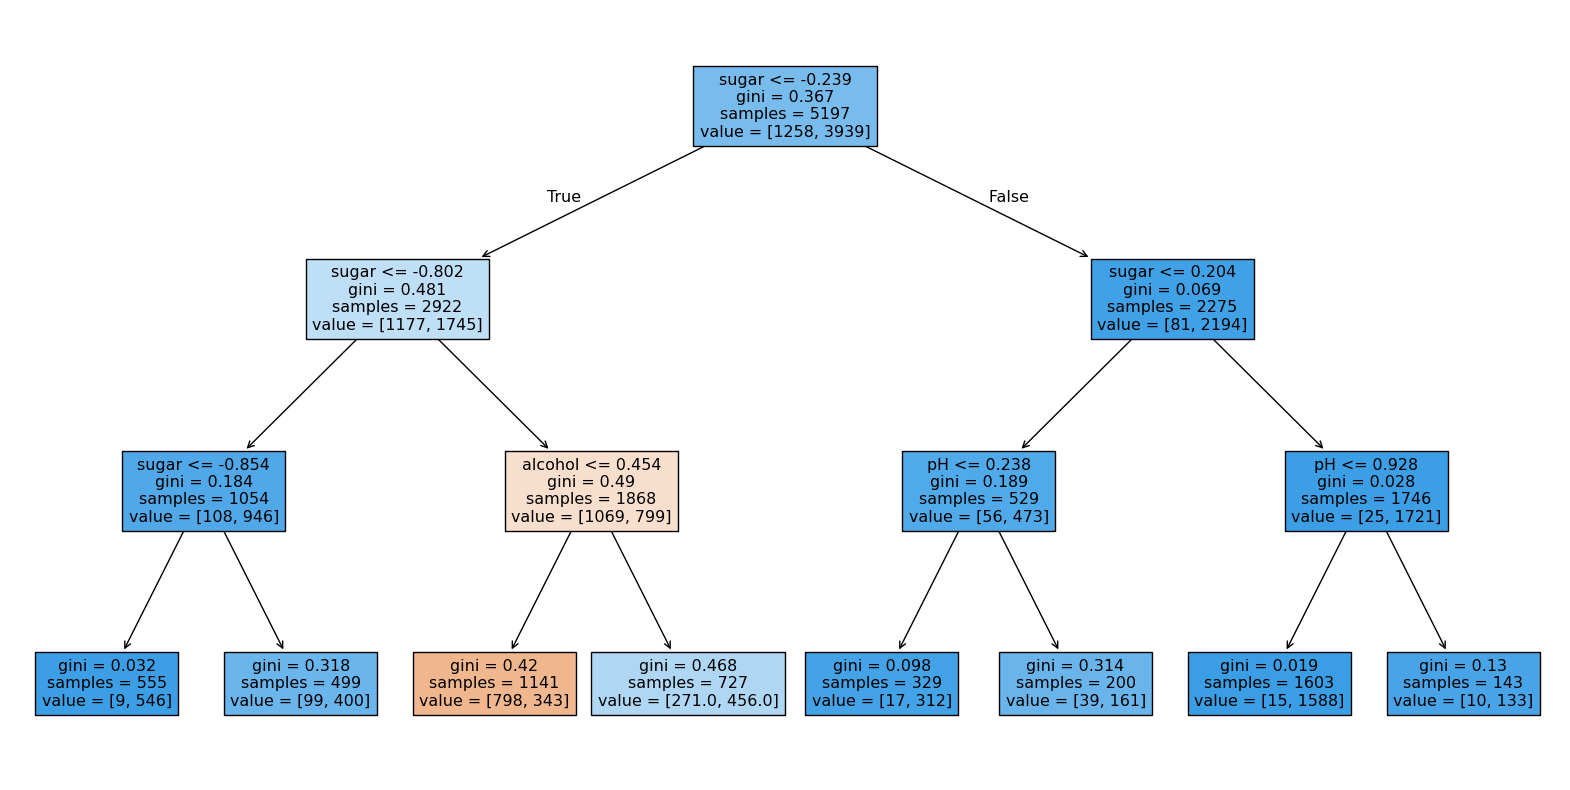

In [16]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않기 때문에 표준화 전처리를 할 필요가 없음 

In [17]:
# 전처리 하기 전의 훈련 세트와 테스트 세트로 결정 트리 모델 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


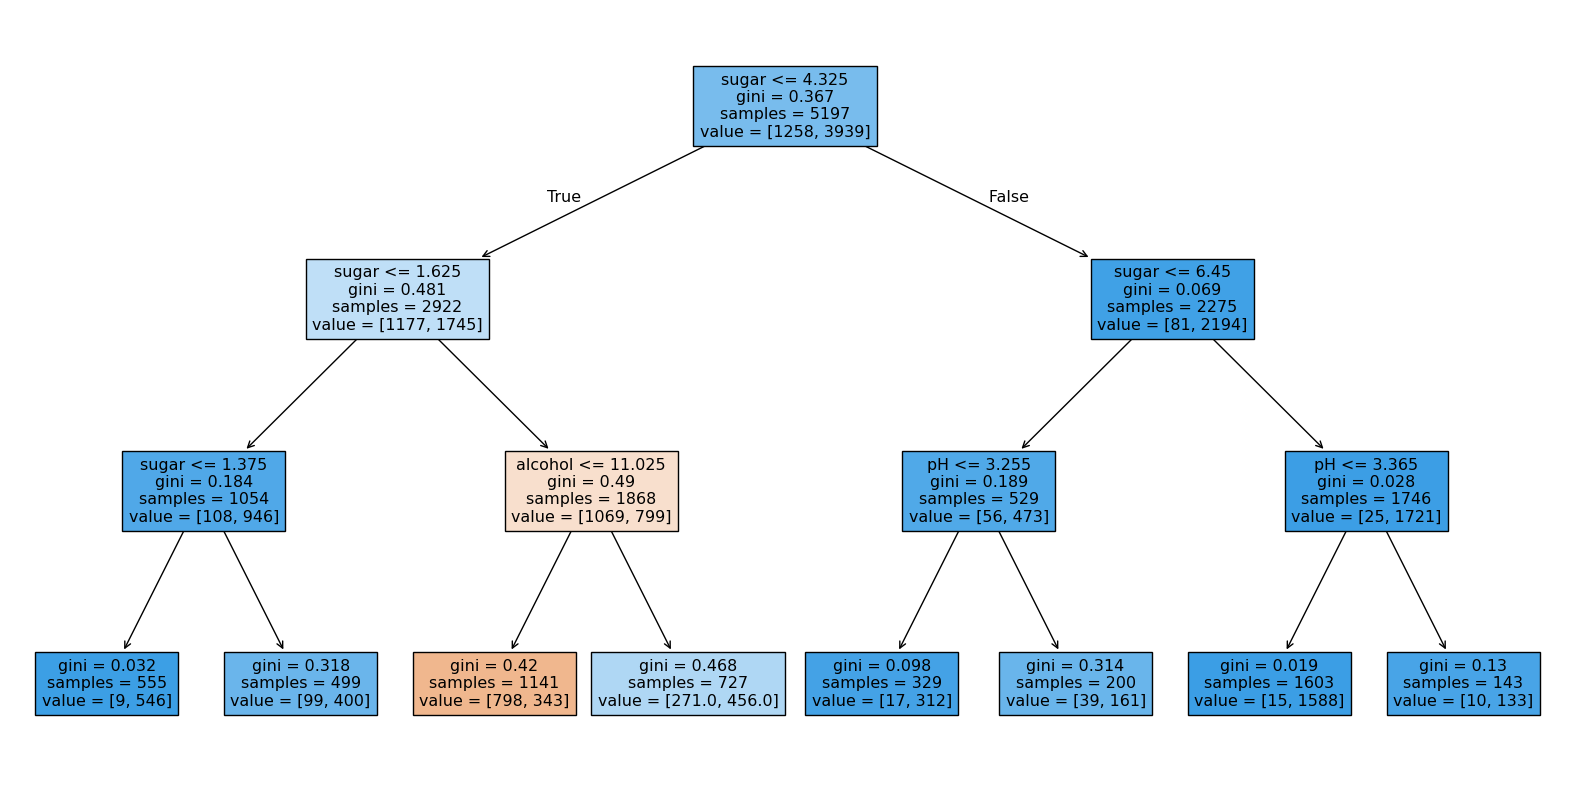

In [18]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

결과는 같지만, 특성값이 표준점수로 바뀌지 않은 상태

In [19]:
# 어떤 특성이 가장 유용한지 계산
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


**특성 중요도**: 각 분할에서 발생한 정보 이득에 노드 샘플 비율을 곱해 더한 값으로 전체 합은 1

이를 통해 불필요한 특성을 제거하거나 주요 특성을 해석할 수 있음

0.8874350586877044
0.8615384615384616


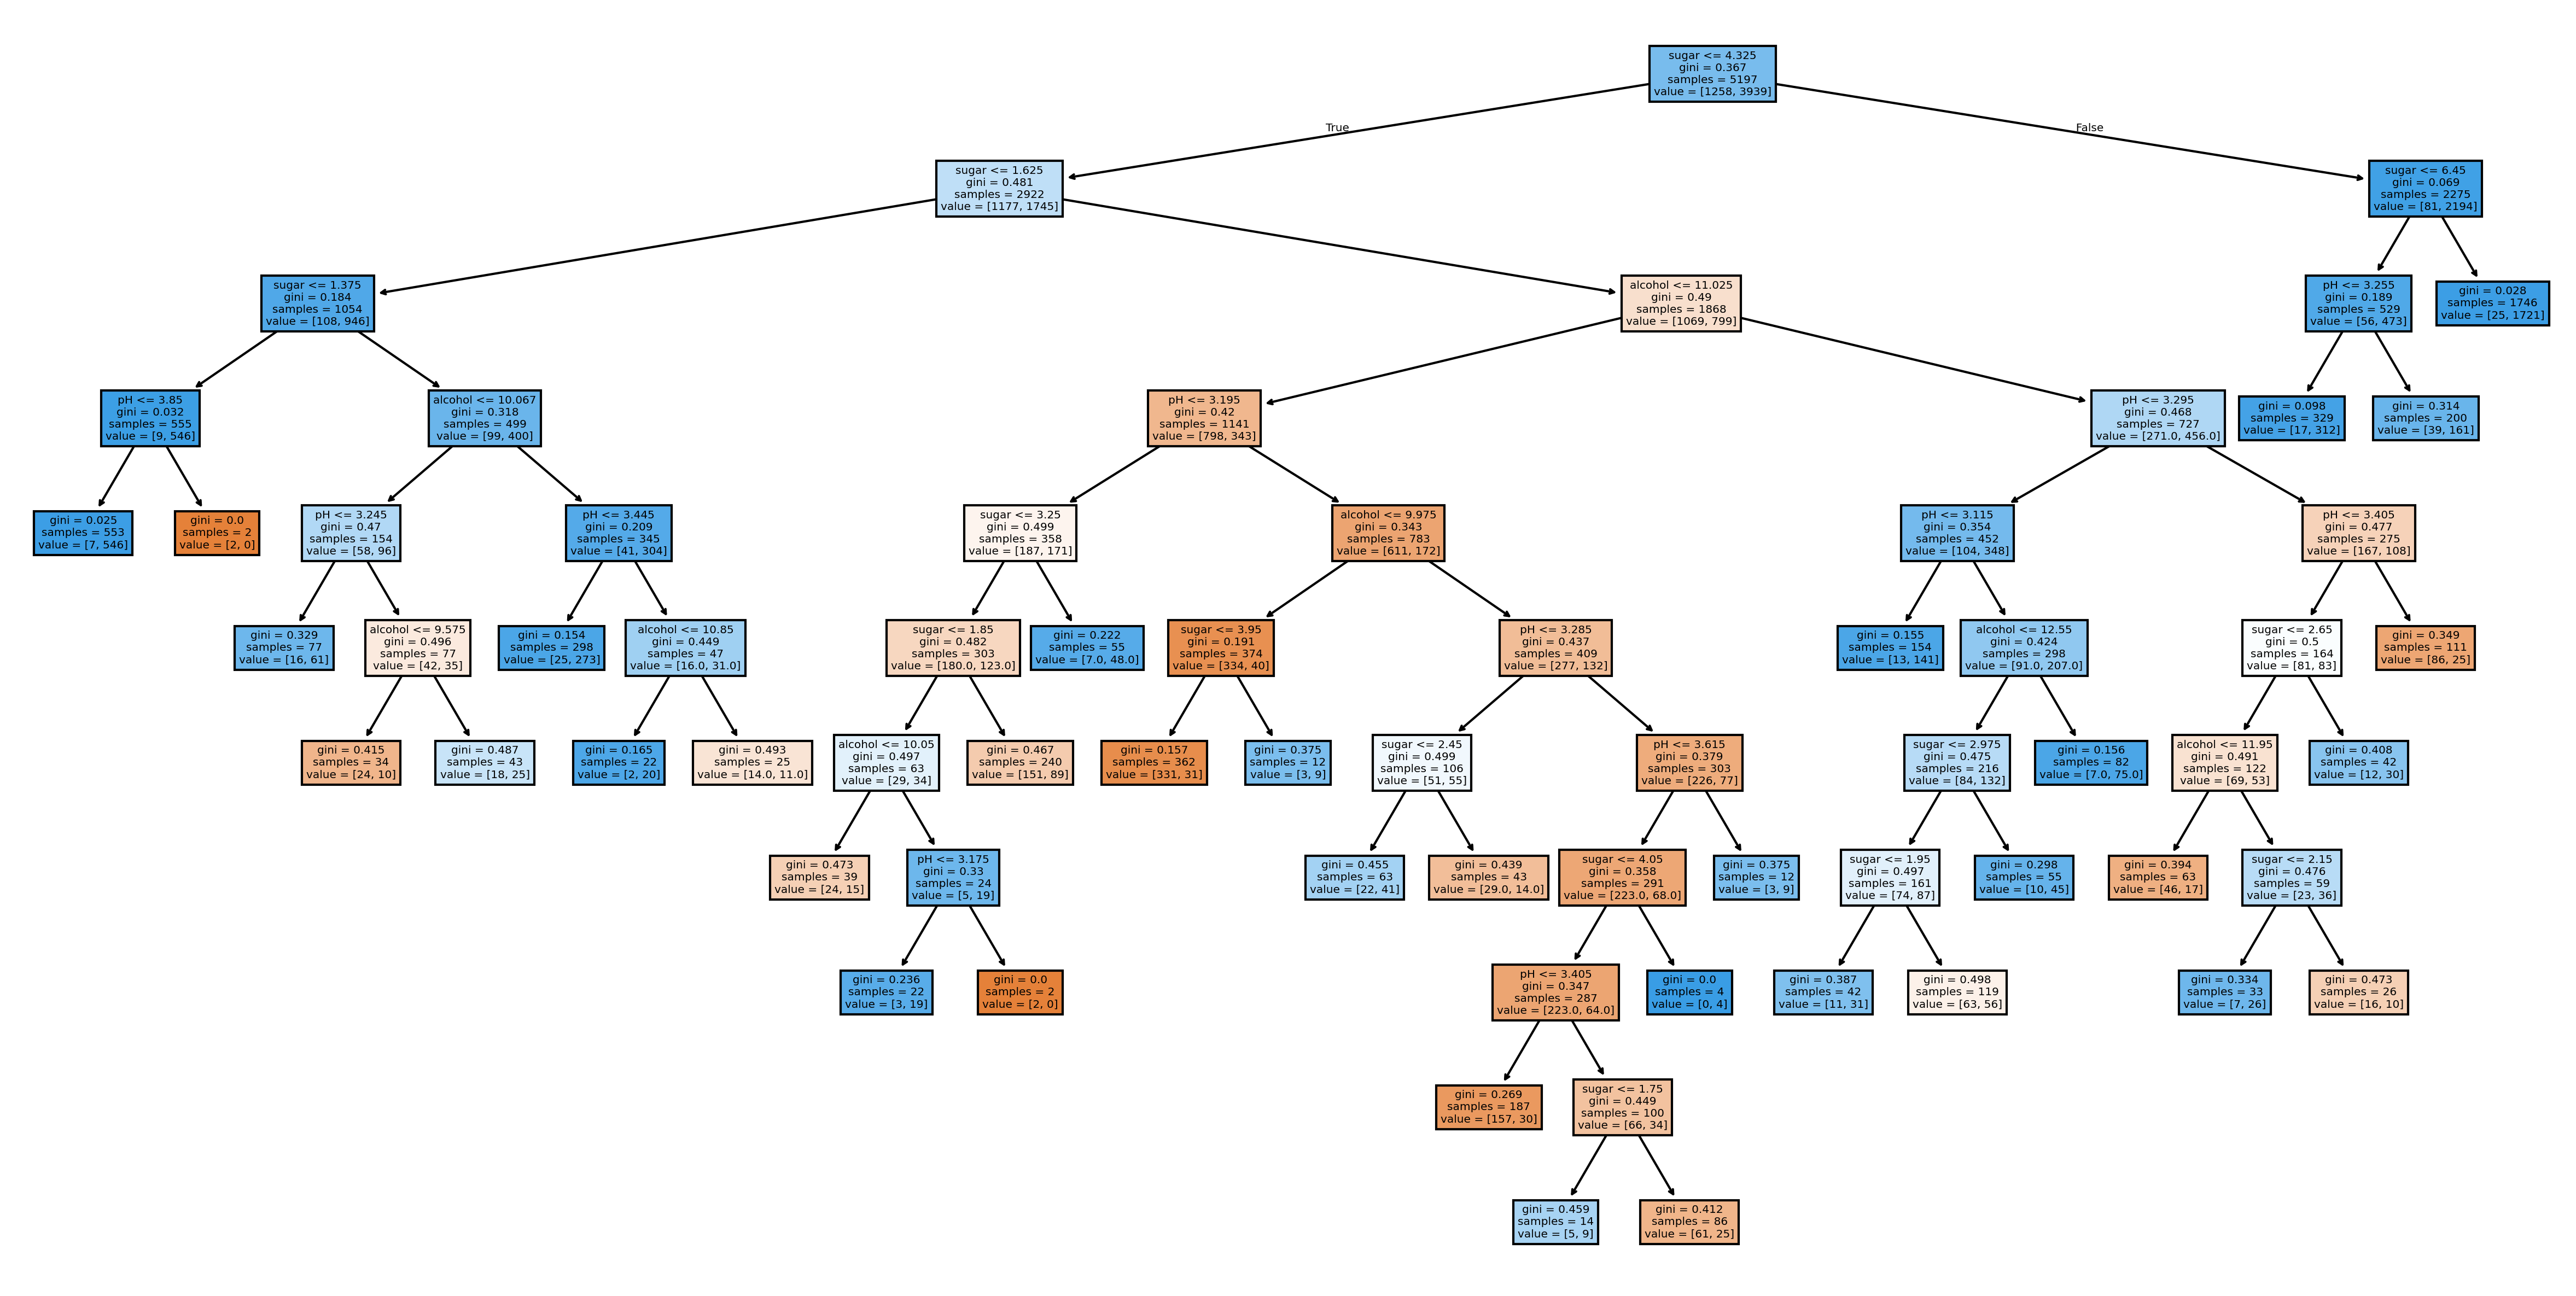

In [20]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
# min_impurity_decrease: ‘불순도가 얼마나 줄어들어야 분할할지’를 결정하는 기준으로, 값이 클수록 트리를 덜 복잡하게 만들어 일반화 성능을 높임.
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,10), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

---

#### 5-2. 교차 검증과 그리드 서치 

**검증세트(Validation Set)**: 훈련 데이터에서 분리하여, 모델의 하이퍼파라미터 조정·모델 선택·과적합 여부 점검에 사용하는 데이터 세트.

In [21]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [22]:
# 타깃과 특성 구분
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [23]:
# 훈련 세트와 테스트 세트 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [24]:
# 훈련 세트와 검증 세트로 구분
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [25]:
# 훈련 세트와 검증 세트 크기 확인
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [26]:
# 모델 평가
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


**교차 검증(cross-validation)**: 모델의 일반화 성능을 안정적으로 평가하기 위해, 훈련 데이터를 여러 번 나누어 반복 학습·평가하는 방식

**K-폴드 교차 검증**: 데이터를 k개의 동일한 크기(또는 유사 크기)로 나누고, 각 부분이 한 번씩 검증세트 역할을 하도록 총 k번 학습·평가를 반복하는 교차 검증 방식.

<img src = "https://github.com/HANISY/AI-Study/blob/main/img/kfold.png?raw=true" width = "700">

In [27]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01248264, 0.00829506, 0.00900316, 0.00864816, 0.00781822]), 'score_time': array([0.00411034, 0.00312734, 0.00246263, 0.00245214, 0.00279093]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


- 처음 2개의 키는 각각 모델을 훈련하는 시간과 검증하는 시간을 의미
- cross_validate() 함수는 기본적으로 5-폴드 교차 검증을 수행(cv 매개변수에서 폴드 수 변경 가능)

In [28]:
# 교차 검증의 최종 점수 확인
# test_score 키에 담긴 5개의 점수를 평균
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


교차 검증을 할 때 훈련 세트를 섞으려면 분할기(Splitter) 지정 필요

사이킷런의 분할기는 교차 검증에서 폴드를 어떻게 나눌지 결정

cross_validate() 함수는 기본 분할기로 <u>회귀 모델일 경우</u> **KFold를 사용**하고, <u>분류 모델일 경우</u> **StratifiedKFold 사용**

**StratifiedKFold**: 불균형 데이터에서도 클래스 비율을 유지하면서 K-폴드 교차 검증을 수행하는 방법


일반 KFold보다 한 단계 더 “안정적”이고 “공정한” 분할 방식

In [29]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [30]:
# 훈련 세트를 섞은 후 10-폴드 교차 검증 수행
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


**하이퍼 파라미터**: 사용자 지정 파라미터

**AutoML**: 사람의 개입 없이 하이퍼파라미터 튜닝을 자동으로 수행

**그리드 서치(Grid Search)**: (사이킷런에서) 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행

In [31]:
# 탐색할 매개변수와 탐색할 값의 리스트를 딕셔너리로 구성
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [32]:
# 그리드 서치 객체 생성
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
# n_jobs 매개변수 : 병령 실행에 사용할 CPU 코어 수 지정, -1로 지정하면 시스템에 있는 모든 코어 사용

In [33]:
# 그리드 서치 수행
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'min_impurity_decrease': [0.0001, 0.0002, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


교차 검증에서 최적의 하이퍼파라미터를 찾으면 전체 훈련 세트로 모델을 다시 만들어야 하지만, 

사이킷런의 그리드 서치는 훈련이 끝나면 교차 검증 점수가 가장 노은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련

In [34]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [35]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [36]:
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 'mean_test_score'키에 저장
# 5번의 교차 검증으로 얻은 점수를 출력
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [37]:
# best_index_ 속성을 사용해 얻은 가장 높은 인덱스로 params 키에 저장된 매개 변수 출력
print(gs.cv_results_['params'][gs.best_index_])

{'min_impurity_decrease': 0.0001}


1. 탐색할 매개변수 지정
2. 훈련 세트에서 그리드 서치를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 탐색<br>
이 조합은 그리드 서치 객체에 저장
3. 그리드 서치는 최상의 매개변수에서 (교차 검증에 사용한 훈련 세틀가 아니라) 전체 훈련 세트를 사용해 최종 모델을 훈련<br>
이 모델도 그리드 서치 객체에 저장 

In [38]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [39]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': range(5, 20), 'min_impurity_decrease': array([0.0001... 0.0009]), 'min_samples_split': range(2, 100, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [40]:
# 최상의 매개변수 조합 확인
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [41]:
# 최상의 교차 검증 점수 확인
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


**랜덤 서치**: 하이퍼파라미터 조합을 전부 탐색하는 게 아니라, 설정한 범위 안에서 '무작위로' 일부 조합만 선택해 평가하는 방법

랜덤 서치에는 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달 

In [42]:
from scipy.stats import uniform, randint
# uniform과 randint는 각각 연속형/정수형 균등 분포에서 하이퍼파라미터 값을 샘플링해 RandomizedSearchCV가 다양한 조합을 시도하도록 지원

In [43]:
rgen = randint(0, 10)
rgen.rvs(10)

array([8, 8, 6, 9, 9, 9, 9, 5, 5, 7])

In [44]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 98,  92, 112,  95, 115, 100,  87, 100, 104,  97]))

In [45]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.57540253, 0.28392859, 0.1733731 , 0.15677258, 0.89329214,
       0.21291233, 0.9220233 , 0.82259469, 0.04368002, 0.40308024])

In [46]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25)        # 리프 노드가 되기 위한 최소 샘플의 개수 
          }

In [47]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)         # 샘플링 횟수는 n_iter 매개 변수에 지정 
rs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....x76ad858afcd0>, 'min_impurity_decrease': <scipy.stats....x76ad858ae5f0>, 'min_samples_leaf': <scipy.stats....x76ad858aecb0>, 'min_samples_split': <scipy.stats....x76ad858af280>}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [48]:
# 최적의 매개변수 조합 출력 
print(rs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [49]:
# 최고의 교차 검증 점수 확인
print(np.max(rs.cv_results_['mean_test_score']))

0.8695428296438884


In [50]:
# 테스트 세트 성능 확인
# 테스트 세트 점수는 검증 세트에 대한 점수보다 조금 작은 것이 일반적
dt = rs.best_estimator_
print(dt.score(test_input, test_target))

0.86


---

#### 5-3. 트리의 앙상블

**정형 데이터**: 어떤 구조로 되어 있는 데이터. CSV, 데이터베이스 혹은 엑셀에 저장하기 쉬움

**비정형 데이터**: 텍스트, 사진, 음악 등. 데이터베이스나 엑셀로 표현하기 어려운 것 

**앙상블 학습(Ensemble Learning)** 알고리즘: <br>
여러 약한 모델을 결합해 강한 모델을 만드는 기법으로, 특히 표·숫자 기반의 정형 데이터에서 높은 성능을 발휘

**신경망 알고리즘(Neural Network)** 알고리즘: <br>인공 뉴런 구조로 복잡한 비선형 패턴을 학습하는 딥러닝 모델로, 이미지·텍스트·음성 같은 비정형 데이터 처리에 강함

**랜덤포레스트(Random Forest)**:<br>
부트스트랩 샘플과 무작위 특성 선택을 이용해 다수의 결정트리를 결합하는 배깅 기반 앙상블 모델로, 정형 데이터에서 강력한 성능을 보임

랜덤하게 선택한 샘플과 특성을 사용하기 때문에 훈련 세트에 과대적합되는 것을 막아주고 검증세트와 테스트세트에서 안정적인 성능을 얻을 수 있음

**부트스트랩 샘플(bootstrap sample)**: <br>
정형 데이터를 '중복 허용 복원추출' 방식으로 무작위 재샘플링하여, 서로 다른 트리들이 학습할 수 있도록 다양성을 만들어주는 데이터 추출 기법

<img src="https://github.com/HANISY/AI-Study/blob/main/img/randomforest.png?raw=true" width="700">

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('http://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [52]:
# 교차 검증 수행
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target,
                        return_train_score=True, n_jobs=-1)     # 검증 점수뿐만 아니라 훈련 세트에 대한 점수도 같이 반환 
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [53]:
# 랜덤 포레스트 모델을 훈련 세트에 훈련한 후 특성 중요도 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


랜덤 포레스트는 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련하기 때문에 <br>
하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻음

= 과대적합을 줄이고 일반화 성능을 높이는 데 도움이 됨

**OOB(Out Of Bag) 샘플**: 부트스트랩 샘플에 포함되지 않고 남는 샘플, 검증 세트의 역할을 함

In [54]:
# OOB 점수 출력
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


**엑스트라 트리(Extra Trees)**: <br>
결정트리를 만들 때 데이터 분할 기준을 매우 무작위로 선택해 학습하는 배깅 기반 앙상블 모델로, <br>
정형 데이터에서 빠르고 과적합에 덜 민감한 것이 특징

많은 트리를 앙상블하기 때문에 과대적합을 막고 검증 세트를 높이는 효과가 있음

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


이 예제는 특성이 많지 않아 랜덤포레스트와 차이가 크지 않음

보통 엑스트라 트리가 무작위성이 좀 더 크기 떄문에 랜덤 포레스트보다 더 많은 결정 트리를 훈련해야 함<br>
하지만 랜덤하게 노드를 분할하기 때문에 빠른 계산 속도가 엑스트라 트리의 장점

In [56]:
# 엑스트라 트리 모델에서의 특성 중요도 출력
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


---

**그레이디언트 부스팅(gradient boosting)**: <br>
깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블<br>
과대적합에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있음

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


학습률을 증가시키고 트리의 개수를 늘리면 조금 더 성능이 향상될 수 있음

In [58]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2,        # 학습률의 기본값은 0.1
                                random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [59]:
# 특성 중요도 확인
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


subsample이 1보다 작으면 훈련 세트의 일부만 무작위로 사용해 학습하며, 이는 무작위성을 증가시켜 과적합을 줄이고 일반화 성능을 높임

---

**히스토그램 기반 그레이디언트 부스팅 (Histogram-based Gradient Boosting)**: <br>
연속형 특성을 히스토그램으로 미리 구간화해서, 트리 분할 시 가능한 후보 지점을 크게 줄여 속도를 극적으로 높인 그래디언트 부스팅 알고리즘

In [60]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


과대적합을 잘 억제하면서 그레이디언트 부스팅보다 조금 더 높은 성능을 제공 

히스토그램 기반 그레이디언트 부스팅은 자체적으로 특성 중요도를 제공하지 않음

**permutation_importance()**: 특성을 하나씩 랜덤하게 섞어 모델의 성능이 변화하는지 관찰하여 어떤 특성이 중요한지 계산<br>
훈련 세트뿐만 아니라 테스트 세트에도 적용할 수 있고 사이킷런에서 제공하는 추정기 모델에 모두 사용 가능

In [61]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target,
                                n_repeats=10, random_state=42, n_jobs=-1)       # n_repeats 기본값은 5
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


permutation_importance() 함수가 반환하는 객체는 **반복하여 얻은 특성 중요도, 평균, 표준편차**

In [62]:
# 테스트 세트의 특성 중요도 계산
result = permutation_importance(hgb, test_input, test_target,
                                n_repeats=10, random_state=42, n_jobs=-1) 
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [63]:
# 성능 최종 확인
hgb.score(test_input, test_target)

0.8723076923076923

In [64]:
# XGBoost를 사용해 와인 데이터의 교차 검증 점수 확인
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9556957943294243 0.8803187236247872


In [66]:
# LightGBM를 사용해 와인 데이터의 교차 검증 점수 확인
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9556957943294243 0.8803187236247872
